# Task 4: Sales Prediction using Python


## Objective: Predict future sales based on advertising spend, platform, and target segment

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv('../Data/Advertising.csv')

In [4]:
# Display first few rows
print("Dataset Preview:\n", df.head())

Dataset Preview:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [5]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [6]:
# Drop unnecessary index column if exists
if '' in df.columns:
    df.drop([''], axis=1, inplace=True)

In [7]:
# Exploratory Data Analysis (EDA)
print("\nBasic Statistics:\n", df.describe())


Basic Statistics:
        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


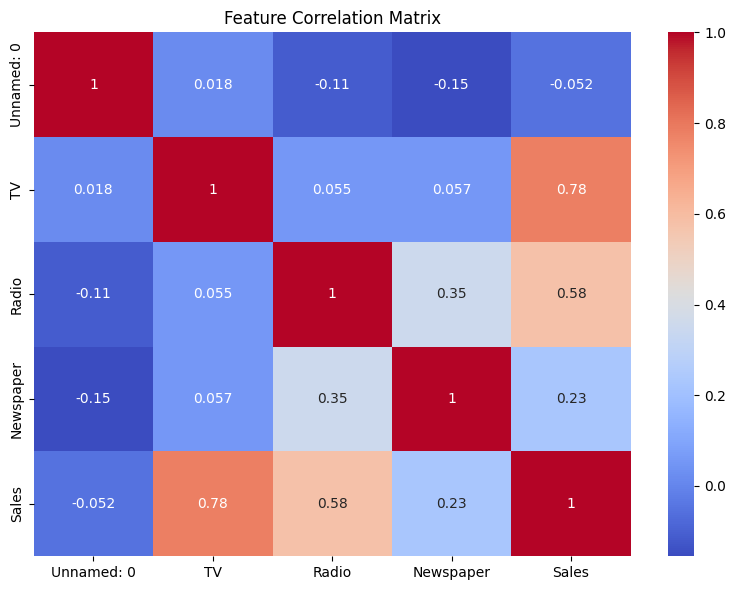

In [8]:
# Correlation analysis
correlation = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict
y_pred = model.predict(X_test)

In [13]:
# Evaluate
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Model Evaluation:
R² Score: 0.899438024100912
RMSE: 1.7815996615334502


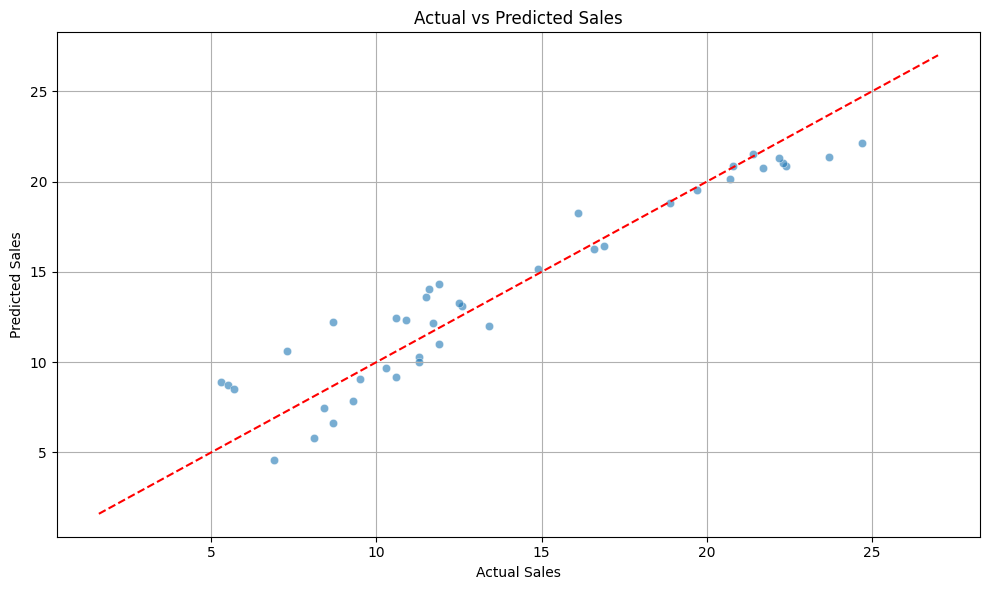

In [14]:
# Visualize Actual vs Predicted Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Feature Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Impact on Sales:\n", coefficients)


Feature Impact on Sales:
      Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


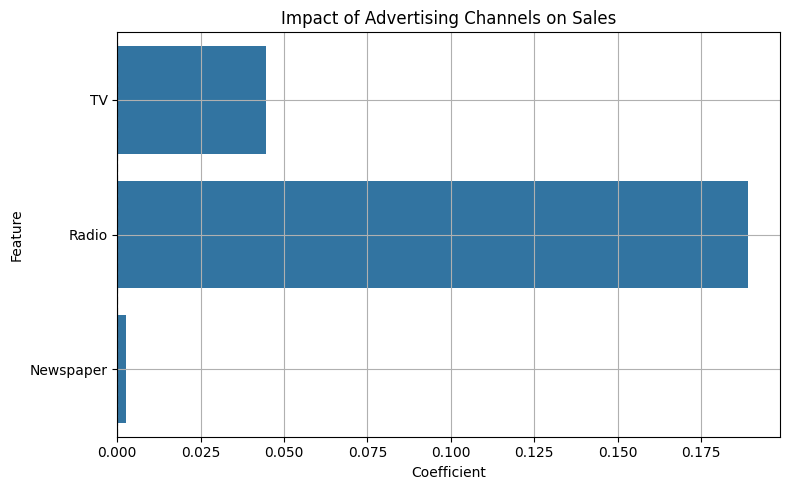

In [16]:
# Plot feature influence
plt.figure(figsize=(8,5))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title('Impact of Advertising Channels on Sales')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Insights
print("\nActionable Marketing Insights:")
print("1. TV advertising has the highest positive impact on sales — consider increasing budget allocation here.")
print("2. Radio also shows a strong influence, making it a good mid-cost option.")
print("3. Newspaper advertising has minimal effect — reconsider its marketing priority.")
print("4. Focus more on high-impact platforms to maximize ROI from advertising spend.")


Actionable Marketing Insights:
1. TV advertising has the highest positive impact on sales — consider increasing budget allocation here.
2. Radio also shows a strong influence, making it a good mid-cost option.
3. Newspaper advertising has minimal effect — reconsider its marketing priority.
4. Focus more on high-impact platforms to maximize ROI from advertising spend.
